### Module import

In [1]:
import matplotlib
from equilibrator_api import ComponentContribution
from equilibrator_pathway import ThermodynamicModel
import seaborn as sns
import matplotlib.pyplot as plt
from equilibrator_pathway.ecm_model import EnzymeCostModel

sns.set_style("dark")

D:\work\python\anaconda\install\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\work\python\anaconda\install\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
comp_contrib = ComponentContribution()

In [3]:
pp = ThermodynamicModel.from_sbtab("HSEC0916_glucose and HSEC1017_xylose.tsv", comp_contrib=comp_contrib)
pp.update_standard_dgs()
pp.dg_confidence = 0.0  # 0.95

In [4]:
%%time
mdf_sol = pp.mdf_analysis()

Wall time: 163 ms


### Calculate the shadow prices of metabolites

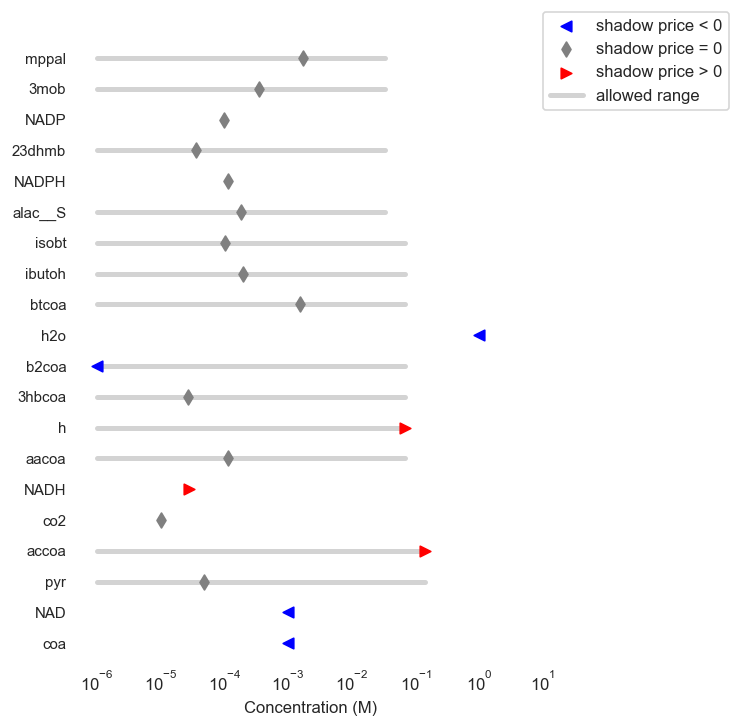

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 7), dpi=120)
mdf_sol.plot_concentrations(ax=ax)
plt.xlim(5*10**-7,10**1)
ax.legend(loc='upper right',fontsize='small',facecolor='none')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, facecolor='white')
#ax.spines['bottom'].set_color('black')
#ax.spines['left'].set_color('black')
ax.axes.yaxis.grid(True, which="major")
ax.set_facecolor('none')
plt.savefig("shadow price_isobutyl butyrate.svg", bbox_inches = 'tight', dpi=300,format="svg")

In [6]:
## print the shadow prices of the metabolites
mdf_sol.compound_df

,compound_id,concentration_in_molar,lower_bound_in_molar,upper_bound_in_molar,shadow_price
0,coa,0.001000,0.001000,0.001000,-0.82588
1,NAD,0.001000,0.001000,0.001000,-0.82588
2,pyr,0.000047,0.000001,0.139000,-0.00000
3,accoa,0.139000,0.000001,0.139000,1.65175
4,co2,0.000010,0.000010,0.000010,0.00000
5,NADH,0.000027,0.000027,0.000027,0.82588
6,aacoa,0.000113,0.000001,0.069000,-0.00000
7,h,0.069000,0.000001,0.069000,0.82588
8,3hbcoa,0.000027,0.000001,0.069000,-0.00000
9,b2coa,0.000001,0.000001,0.069000,-0.82588


### Calculate the MDF value of the biosynthesis pathway for the two strains

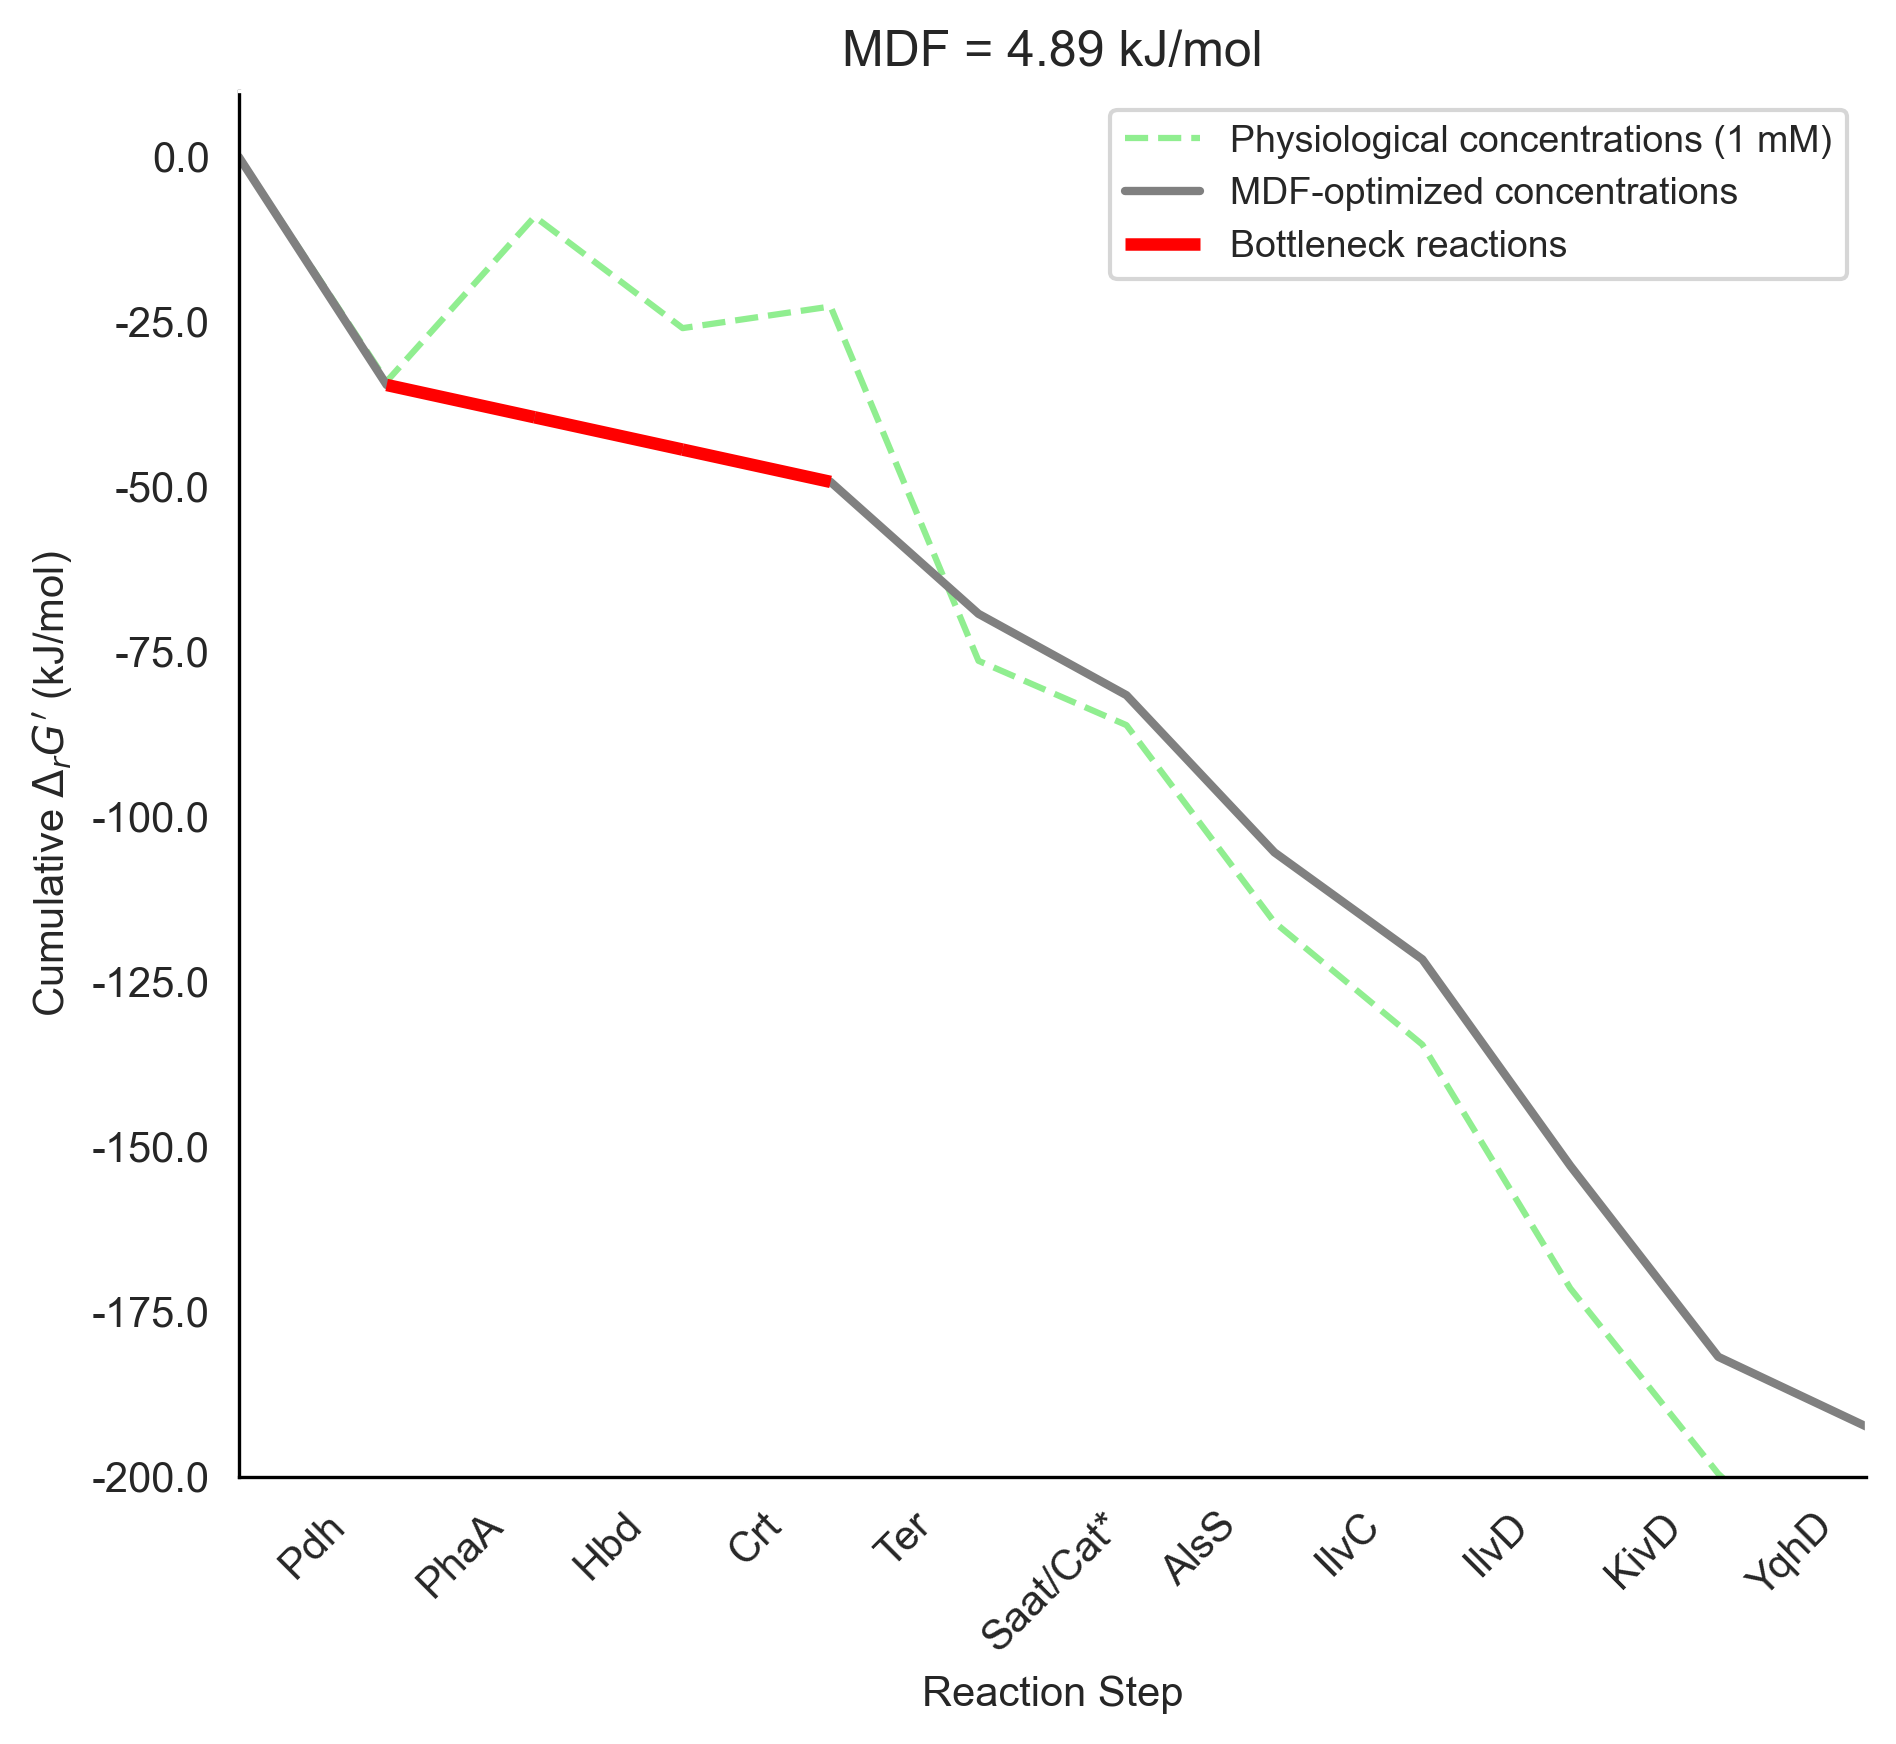

In [7]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1, 1, figsize=(7, 6), dpi=300)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
mdf_sol.plot_driving_forces(ax=ax)
plt.ylim(-200,10)
ax.legend(loc='upper right',fontsize=9,facecolor='none')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.axes.xaxis.grid(True, which="major")
ax.set_facecolor('none')
plt.savefig("MDF_isobutyl butyrate.svg", bbox_inches = 'tight', dpi=300,format="svg")

In [8]:
## print the gibbs free energies of the reactions
mdf_sol.reaction_df

,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,Pdh,NAD + coa + pyr = NADH + accoa + co2,3e-06 millimolar / second,-34.02434772279116 kilojoule / mole,-34.02434772279116 kilojoule / mole,-34.02434772279116 kilojoule / mole,-34.56662519833397 kilojoule / mole,0.00000
1,PhaA,2 accoa = aacoa + coa,3e-06 millimolar / second,24.96121615861489 kilojoule / mole,24.96121615861489 kilojoule / mole,24.96121615861489 kilojoule / mole,-4.8944204338350445 kilojoule / mole,0.33333
2,Hbd,NADH + aacoa + h = 3hbcoa + NAD,3e-06 millimolar / second,-16.889474845328778 kilojoule / mole,-16.889474845328778 kilojoule / mole,-16.889474845328778 kilojoule / mole,-4.894420433767296 kilojoule / mole,0.33333
3,Crt,3hbcoa = b2coa + h2o,3e-06 millimolar / second,3.2759179325111774 kilojoule / mole,3.2759179325111774 kilojoule / mole,3.2759179325111774 kilojoule / mole,-4.89442043369359 kilojoule / mole,0.33333
4,Ter,NADH + b2coa + h = NAD + btcoa,3e-06 millimolar / second,-53.68402969688259 kilojoule / mole,-53.68402969688259 kilojoule / mole,-53.68402969688259 kilojoule / mole,-19.988760561235132 kilojoule / mole,0.00000
5,Saat/Cat*,btcoa + ibutoh = coa + isobt,3e-06 millimolar / second,-9.743788557179812 kilojoule / mole,-9.743788557179812 kilojoule / mole,-9.743788557179812 kilojoule / mole,-12.327917358540953 kilojoule / mole,0.00000
6,AlsS,h + 2 pyr = alac__S + co2,3e-06 millimolar / second,-29.870720495355414 kilojoule / mole,-29.870720495355414 kilojoule / mole,-29.870720495355414 kilojoule / mole,-23.814703571788893 kilojoule / mole,0.00000
7,IlvC,NADPH + alac__S + h = 23dhmb + NADP,3e-06 millimolar / second,-18.538468409559982 kilojoule / mole,-18.538468409559982 kilojoule / mole,-18.538468409559982 kilojoule / mole,-16.206367018100675 kilojoule / mole,0.00000
8,IlvD,23dhmb = 3mob + h2o,3e-06 millimolar / second,-36.93032392724518 kilojoule / mole,-36.93032392724518 kilojoule / mole,-36.93032392724518 kilojoule / mole,-31.28972821457387 kilojoule / mole,0.00000
9,KivD,3mob + h = co2 + mppal,3e-06 millimolar / second,-10.972363460920889 kilojoule / mole,-10.972363460920889 kilojoule / mole,-28.087200995641922 kilojoule / mole,-28.936285304718563 kilojoule / mole,0.00000
